In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [31]:
# Ścieżka do katalogu z obrazami
data_dir = '../graph_generator/4'

# Wielkość obrazów i wielkość partii
img_height, img_width = 180, 180
batch_size = 32

In [32]:
# Generowanie danych treningowych
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 4 classes.
Using 640 files for training.


In [33]:
class_names = sorted(os.listdir(data_dir))
num_classes = len(class_names)

In [34]:
# Tworzenie generatora danych
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [35]:
# Generowanie danych treningowych
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 640 images belonging to 4 classes.


In [36]:
# Generowanie danych walidacyjnych
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 160 images belonging to 4 classes.


In [37]:
# Tworzenie modelu
model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [38]:
# Kompilacja modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [39]:
# Trenowanie modelu
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10
)

Epoch 1/10


b:\Projekty\Studia\Semestry\II_stopien_III_semestr\Praca magisterska\graph_classification\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.2592 - loss: 8.0982 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.2405 - loss: 12.1165 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.2389 - loss: 12.2403 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.2317 - loss: 12.0472 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.2483 - loss: 12.3213 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.2441 - loss: 12.4812 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.2514 - loss: 12.1261 - val_accuracy: 0.2500 - val_loss: 12.0886
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.2493 - loss: 12.0706 - val_accuracy:

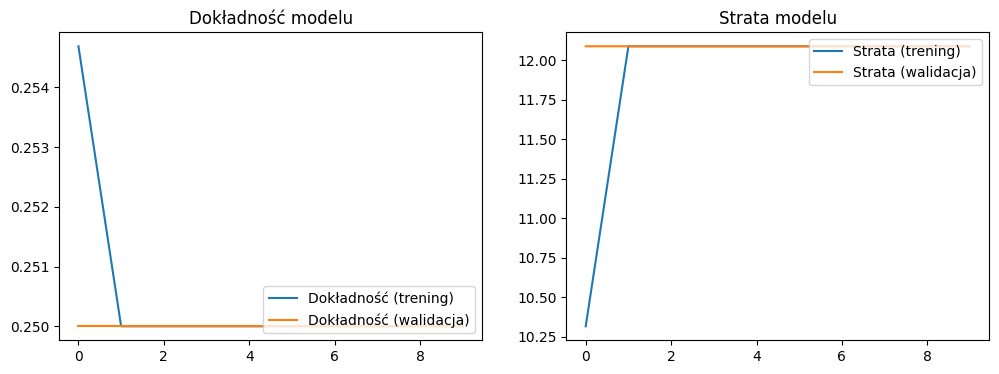

In [40]:
# Wykres dokładności
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.legend(loc='lower right')
plt.title('Dokładność modelu')

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Strata (trening)')
plt.plot(history.history['val_loss'], label='Strata (walidacja)')
plt.legend(loc='upper right')
plt.title('Strata modelu')

plt.show()

In [43]:
# Wyświetlanie dokładności na zbiorze treningowym i walidacyjnym
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
acc
val_acc

[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

In [47]:
# Ścieżka do obrazu, który chcesz przetestować
test_photo_path = 'test_graphs/'
test_photos = ['rest-directed-9.png', 'unlabeled_undirected-24.png', 'full-113.png', 'path-78.png']
image_path = test_photo_path + test_photos[3]

# Wczytanie obrazu i dostosowanie go do odpowiedniego rozmiaru
img = image.load_img(image_path, target_size=(img_height, img_width))

# Przekształcenie obrazu w tablicę numpy i dodanie dodatkowego wymiaru
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Przewidywanie klasy obrazu
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Ten obraz najprawdopodobniej należy do klasy {} z prawdopodobieństwem {:.2f} procent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ten obraz najprawdopodobniej należy do klasy cycle z prawdopodobieństwem 100.00 procent.
